In [131]:
import numpy as np
import pandas as pd
import os
import networkx as nx
import random
import mutation
import crossover
import generator
import fitness
from datetime import datetime

In [141]:
# user given constants
src=0
dst=3
bandwidth_threshold = 2
# parameters
generation = 100
max_depth = 5
population_size = 80

In [142]:
random.seed(datetime.now())

In [168]:
#Read file related to testing
def get_test_file():
    '''Generator that return string of file name'''
    import re
    for files in os.listdir():
        if re.match('test.+\.csv', files) is not None:
            yield files
            
def csv_to_np(filename):
    return pd.read_csv(filename, header=None, delim_whitespace=True).values

# Use generator
#bandwidth_matrix = generator.generate("complete", (1, 15), n=15).out(type="2d_list")
bandwidth_matrix = generator.generate("complete", (1, 100), n=15).out(type="2d_list")


#bandwidth_matrix = csv_to_np('test1.csv')
print(type(bandwidth_matrix), '\n', bandwidth_matrix)

<class 'numpy.ndarray'> 
 [[  0  13  59  33  95  26  76  53  21  40   9  31  58  74  88]
 [ 13   0  19  53  85  97  91  71  22   9   4   8  21  34  28]
 [ 59  19   0  15  72  99  82   9  91  35  16  13  30  77  15]
 [ 33  53  15   0  73  96  96  81  81  91  30  80  26  77  28]
 [ 95  85  72  73   0  10  18  54  53 100  37  63  85  82  88]
 [ 26  97  99  96  10   0  12  31  10  93  76  56  24  19  21]
 [ 76  91  82  96  18  12   0  85  37   6  62  45   5  83   4]
 [ 53  71   9  81  54  31  85   0  21  46  54  18  19  29  86]
 [ 21  22  91  81  53  10  37  21   0  47  18  67  38  65  96]
 [ 40   9  35  91 100  93   6  46  47   0  35  55  65   3  59]
 [  9   4  16  30  37  76  62  54  18  35   0  38  99  25  90]
 [ 31   8  13  80  63  56  45  18  67  55  38   0  62  53  32]
 [ 58  21  30  26  85  24   5  19  38  65  99  62   0  70   9]
 [ 74  34  77  77  82  19  83  29  65   3  25  53  70   0  23]
 [ 88  28  15  28  88  21   4  86  96  59  90  32   9  23   0]]


In [169]:
def np_to_nx(bandwidth_matrix):
    # build neighbor matrix
    neighbor_matrix = []
    for row, _ in enumerate(bandwidth_matrix):
        neighbor_matrix.append(np.where(bandwidth_matrix[row] > 0)[0])
    neighbor_matrix = np.array(neighbor_matrix)
    
    # build the list of edges
    edges = np.array(np.where(bandwidth_matrix > 0)).transpose()

    # build nx Graph instance
    G = nx.Graph()
    num_of_nodes = bandwidth_matrix.shape[0]
    G.add_nodes_from(range(num_of_nodes))
    G.add_edges_from(edges)
    return G, neighbor_matrix
    
G, neighbor_matrix = np_to_nx(bandwidth_matrix)

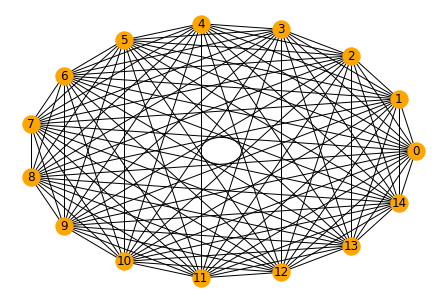

In [170]:
def nx_visualize(G):
    # Visualize the graph
    %matplotlib inline
    nx.draw_shell(G, with_labels=True, node_color='orange')

nx_visualize(G)

In [171]:
def initial(G, s, d, iddfs_depth, population_size):

    # Add shortest paths (seeding)
    shortest_path_generator = nx.all_shortest_paths(G, source=s, target=d)
    shortest_paths = list(shortest_path_generator)
    
    # Add worse path
    path_generator = nx.all_simple_paths(G, source=0, target=3, cutoff=iddfs_depth)
    paths = list(path_generator)
    #population_size = min(len(paths), population_size)

    long_paths = random.sample(paths, population_size - len(shortest_paths))
    #print("short:", shortest_paths)
    #print("long:", long_paths)
    #global bandwidth_matrix
    #for p in paths:
      #  fit = fitness.fitness(p, bandwidth_matrix)

        #print(fitness.fitness(p, bandwidth_matrix), end=',')
    return shortest_paths+long_paths

# for example, given src=0, dst=3, max_depth=7, population_size=20
pop = initial(G, src, dst, max_depth, population_size)
print(pop)

[[0, 3], [0, 4, 6, 5, 7, 3], [0, 8, 13, 5, 14, 3], [0, 5, 4, 10, 3], [0, 11, 6, 13, 10, 3], [0, 7, 8, 13, 4, 3], [0, 1, 5, 11, 13, 3], [0, 2, 6, 14, 11, 3], [0, 4, 13, 14, 2, 3], [0, 9, 8, 4, 3], [0, 6, 2, 13, 11, 3], [0, 12, 8, 5, 1, 3], [0, 5, 9, 10, 2, 3], [0, 8, 11, 1, 4, 3], [0, 2, 10, 6, 11, 3], [0, 14, 7, 12, 5, 3], [0, 2, 4, 5, 8, 3], [0, 12, 10, 11, 1, 3], [0, 5, 1, 11, 9, 3], [0, 4, 5, 1, 9, 3], [0, 6, 14, 12, 5, 3], [0, 14, 11, 13, 5, 3], [0, 11, 5, 10, 12, 3], [0, 7, 11, 12, 5, 3], [0, 6, 2, 14, 3], [0, 11, 7, 14, 9, 3], [0, 10, 2, 9, 13, 3], [0, 1, 2, 5, 14, 3], [0, 10, 7, 13, 12, 3], [0, 1, 9, 4, 8, 3], [0, 4, 1, 8, 10, 3], [0, 6, 1, 8, 4, 3], [0, 8, 2, 13, 5, 3], [0, 5, 7, 8, 2, 3], [0, 8, 4, 11, 3], [0, 13, 4, 12, 6, 3], [0, 1, 11, 14, 5, 3], [0, 4, 6, 10, 1, 3], [0, 12, 4, 8, 1, 3], [0, 1, 5, 13, 12, 3], [0, 12, 9, 14, 5, 3], [0, 5, 4, 10, 9, 3], [0, 11, 2, 5, 12, 3], [0, 7, 11, 1, 5, 3], [0, 12, 11, 14, 13, 3], [0, 2, 10, 4, 11, 3], [0, 13, 4, 5, 1, 3], [0, 1, 13, 6, 

In [172]:
# Edge density of graph
# This is for calculating parameter (但現在還沒做)
edge_density = G.size()*2/G.order()*(G.order()-1)
print(edge_density)

196.0


In [173]:
# main loop
new_pop = []
for g in range(generation):
    #display(pd.DataFrame(fitness.population_with_fitness(pop, bandwidth_matrix)))
    children_pop = []
    
    # crossover
    for idx in range(len(pop)-1):
        child1, child2 = crossover.random_crossover(pop[idx], pop[idx+1], bandwidth_matrix)
        pop += [crossover.check_cycle(child1), crossover.check_cycle(child2)]
    
    # mutation
    for ind in pop:
        children_pop.append(crossover.check_cycle(mutation.mutation(neighbor_matrix, ind)))

    # diversity maintenance
    pop = np.unique(pop+children_pop).tolist()
    
    # fitness evaluation
    pop_with_fit = fitness.population_with_fitness(pop, bandwidth_matrix)
    
    # selection
    pop = pd.DataFrame(sorted(pop_with_fit, key=lambda ind: ind['fitness'], reverse=True))
    #display(pop)
    pop = pop['individual'][0:population_size].tolist()

# count path length of each individual
path_length = []
for ind in pop:
    path_length.append(len(ind))

In [174]:
pop_with_fit = fitness.population_with_fitness(pop, bandwidth_matrix)
rst = pd.DataFrame(sorted(pop_with_fit, key=lambda ind: ind['fitness'], reverse=True))
rst['hop'] = path_length
rst.head()

,fitness,individual,hop
0,91,"[0, 4, 9, 3]",4
1,81,"[0, 14, 7, 3]",4
2,77,"[0, 4, 13, 3]",4
3,76,"[0, 6, 3]",3
4,76,"[0, 6, 3, 8, 3]",5


In [175]:
# Ref: https://pythonhealthcare.org/tag/pareto-front/
def identify_pareto(scores):
    
    # flip num_of_hops to negative so that we can maxmize it
    scores[:,1] = -scores[:,1]
    
    # Count number of items
    population_size = scores.shape[0]
    # Create a NumPy index for scores on the pareto front (zero indexed)
    population_ids = np.arange(population_size)
    # Create a starting list of items on the Pareto front
    # All items start off as being labelled as on the Parteo front
    pareto_front = np.ones(population_size, dtype=bool)
    # Loop through each item. This will then be compared with all other items
    for i in range(population_size):
        # Loop through all other items
        for j in range(population_size):
            
            # Check if our 'i' pint is dominated by out 'j' point
            if all(scores[j] >= scores[i]) and any(scores[j] > scores[i]):
                # j dominates i. Label 'i' point as not on Pareto front
                pareto_front[i] = 0
                # Stop further comparisons with 'i' (no more comparisons needed)
                break
   
    # Add the right-most & down-most points
    max_bandwidth = max(scores[:, 0])
    min_length = max(scores[:, 1])

    for i in range(population_size):
        if scores[i][0] == max_bandwidth or scores[i][1] == min_length:
            pareto_front[i] = 1
    
    
    # flip back the negative sign of num_of_hops
    scores[:,1] = -scores[:,1]
    
    # Return ids of scenarios on pareto front
    return population_ids[pareto_front]


In [176]:
data = rst.drop(columns='individual').values
front_idx = identify_pareto(data)
pareto_front= data[front_idx]
pareto_front.sort(axis=0)
pareto_front

array([[33,  2],
       [76,  3],
       [91,  4]])

In [177]:
all(data[0] > data[1]) 

False

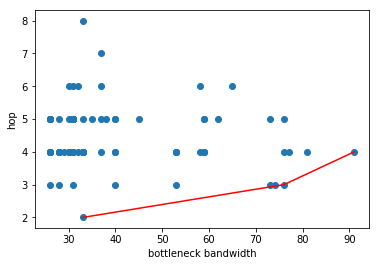

In [178]:
import matplotlib.pyplot as plt
plt.scatter(rst['fitness'], rst['hop'])
plt.plot(pareto_front[:, 0], pareto_front[:, 1], color='r')
plt.xlabel('bottleneck bandwidth')
plt.ylabel('hop')
plt.show()
#plt.

In [85]:
rst

,fitness,individual,hop
0,81,"[0, 6, 11, 3]",4
1,78,"[0, 5, 4, 3]",4
2,78,"[0, 6, 3]",3
3,76,"[0, 1, 10, 3]",4
4,76,"[0, 6, 10, 3]",4
5,66,"[0, 3]",2
6,66,"[0, 3, 0, 3]",4
7,66,"[0, 3, 4, 3]",4
8,66,"[0, 3, 10, 3]",4
9,66,"[0, 3, 11, 6, 3]",5


In [39]:
#pop


In [53]:
pd.DataFrame(bandwidth_matrix)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0,80,84,69,22,66,93,79,80,6,53,57,2,13,63
1,80,0,69,47,28,67,60,72,84,11,15,33,30,14,62
2,84,69,0,14,5,31,56,62,34,78,43,93,65,10,3
3,69,47,14,0,39,86,61,78,98,87,6,48,34,91,24
4,22,28,5,39,0,85,40,75,44,13,42,17,17,83,23
5,66,67,31,86,85,0,14,3,19,58,11,98,33,95,62
6,93,60,56,61,40,14,0,35,49,10,8,94,23,60,30
7,79,72,62,78,75,3,35,0,94,47,19,57,69,77,56
8,80,84,34,98,44,19,49,94,0,55,63,95,27,6,81
9,6,11,78,87,13,58,10,47,55,0,59,1,5,5,78


In [25]:
#bandwidth_matrix.transpose() == bandwidth_matrix